In [1]:
#Please execute this cell
import jupman
%matplotlib inline

# Pandas solutions

## [Download exercises zip](../_static/generated/pandas.zip)

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/pandas)


## 1. Introduction

Today we will try analyzing data with Pandas

* data analysis with Pandas library
* plotting with MatPlotLib
* Examples from AstroPi dataset
* Exercises with  meteotrentino dataset

Python gives powerful tools for data analysis:

![pydata iuiu34](img/pydata.png)

One of these is [Pandas](https://pandas.pydata.org/), which gives fast and flexible data structures, especially for interactive data analysis.

### What to do

unzip exercises in a folder, you should get something like this: 

```
 pandas
     pandas.ipynb     
     pandas-sol.ipynb
     eures-jobs-sol.ipynb
     jupman.py
```

<div class="alert alert-warning">

**WARNING 1**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


3. open Jupyter Notebook from that folder. Two things should open, first a console and then browser. 
4. The browser should show a file list: navigate the list and open the notebook `pandas/pandas.ipynb`

<div class="alert alert-warning">

**WARNING 2**: DO NOT use the _Upload_ button in Jupyter, instead navigate in Jupyter browser to the unzipped folder !
</div>

5. Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`



### Check installation

First let's see if you have already installed pandas on your system, try executing this cell with Ctrl-Enter:

In [2]:
import pandas as pd


If you saw no error messages, you can skip installation, otherwise do this:

* Anaconda - open Anaconda Prompt and issue this:

`conda install pandas`

* Without Anaconda (`--user` installs in your home):

`python3 -m pip install --user pandas`

## 2. Data analysis of Astro Pi


Let's try analyzing data recorded on a Raspberry present on the International Space Station, downloaded from here:

[raspberrypi.org/learning/astro-pi-flight-data-analysis/worksheet](https://www.raspberrypi.org/learning/astro-pi-flight-data-analysis/worksheet/)

in which it is possible to find the detailed description of data gathered by sensors, in the month of February 2016 (one record each 10 seconds).

![ISS uiu9u](img/International_Space_Station_exploded_diagram_large.jpg)

The method  ```read_csv``` imports data from a CSV file and saves them in DataFrame structure.

In this exercise we shall use the file [Columbus_Ed_astro_pi_datalog.csv](Columbus_Ed_astro_pi_datalog.csv)

In [3]:
import pandas as pd   # we import pandas and for ease we rename it to 'pd'
import numpy as np    # we import numpy and for ease we rename it to 'np'

# remember the encoding !
df = pd.read_csv('Columbus_Ed_astro_pi_datalog.csv', encoding='UTF-8')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 20 columns):
ROW_ID        110869 non-null int64
temp_cpu      110869 non-null float64
temp_h        110869 non-null float64
temp_p        110869 non-null float64
humidity      110869 non-null float64
pressure      110869 non-null float64
pitch         110869 non-null float64
roll          110869 non-null float64
yaw           110869 non-null float64
mag_x         110869 non-null float64
mag_y         110869 non-null float64
mag_z         110869 non-null float64
accel_x       110869 non-null float64
accel_y       110869 non-null float64
accel_z       110869 non-null float64
gyro_x        110869 non-null float64
gyro_y        110869 non-null float64
gyro_z        110869 non-null float64
reset         110869 non-null int64
time_stamp    110869 non-null object
dtypes: float64(17), int64(2), object(1)
memory usage: 16.9+ MB


We can quickly see rows and columns of the dataframe with the attribute `shape`:

**NOTE**: `shape` is not followed by rounded parenthesis !

In [4]:
df.shape

(110869, 20)

The `describe` method gives you on the fly many summary info:

* rows counting
* the average
* [standard deviation](https://it.wikipedia.org/wiki/Scarto_quadratico_medio)
* [quantiles](https://en.wikipedia.org/wiki/Quantile)
* minimum and maximum

In [5]:
df.describe()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,55435.000000,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,32005.267835,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,1.000000,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,27718.000000,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,55435.000000,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,83152.000000,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,110869.000000,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


**QUESTION**: is there some missing field from the table produced by describe? Why is it not included? 

To limit `describe` to only one column like `humidity`, you can write like this:

In [6]:
df['humidity'].describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

Notation with the dot is even more handy:

In [7]:
df.humidity.describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

<div class="alert alert-warning">

**WARNING: Careful about spaces!**:

In case the field name has spaces (es. `'blender rotations'`), **do not** use the dot notation, instead use squared bracket notation seen above (ie: `df.['blender rotations'].describe()`)
</div>

`head` method gives back the first datasets:

In [8]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20


`tail` method gives back last dataset:

In [9]:
df.tail()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50
110868,110869,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0,2016-02-29 09:25:00


`colums` property gives the column headers:

In [10]:
df.columns

Index(['ROW_ID', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset', 'time_stamp'],
      dtype='object')

**Nota**: as you see in the above, the type of the found object  is not a list, but a special container defined by pandas:

In [11]:
type(df.columns)

pandas.core.indexes.base.Index

Nevertheless, we can access the elements of this container using indeces within the squared parenthesis:

In [12]:
df.columns[0]

'ROW_ID'

In [13]:
df.columns[1]

'temp_cpu'

### 2.1 Exercise: meteo info 

✪ a) Create a new dataframe called  `meteo` by importing the data from file meteo.csv, which contains the meteo data of Trento from November 2017 (source: https://www.meteotrentino.it). **IMPORTANT**: assign the dataframe to a variable called  `meteo` (so we avoid confusion whith AstroPi dataframe)


b) Visualize the information about this dataframe.

In [14]:
# write here - create dataframe

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
print("COLUMNS:")
print()
print(meteo.columns)
print()
print("INFO:")
print(meteo.info())
print()
print("HEAD():")

meteo.head()


COLUMNS:

Index(['Date', 'Pressure', 'Rain', 'Temp'], dtype='object')

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
Date        2878 non-null object
Pressure    2878 non-null float64
Rain        2878 non-null float64
Temp        2878 non-null float64
dtypes: float64(3), object(1)
memory usage: 90.0+ KB
None

HEAD():


,Date,Pressure,Rain,Temp
0,01/11/2017 00:00,995.4,0.0,5.4
1,01/11/2017 00:15,995.5,0.0,6.0
2,01/11/2017 00:30,995.5,0.0,5.9
3,01/11/2017 00:45,995.7,0.0,5.4
4,01/11/2017 01:00,995.7,0.0,5.3


In [14]:
# write here - create dataframe



COLUMNS:

Index(['Date', 'Pressure', 'Rain', 'Temp'], dtype='object')

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
Date        2878 non-null object
Pressure    2878 non-null float64
Rain        2878 non-null float64
Temp        2878 non-null float64
dtypes: float64(3), object(1)
memory usage: 90.0+ KB
None

HEAD():


,Date,Pressure,Rain,Temp
0,01/11/2017 00:00,995.4,0.0,5.4
1,01/11/2017 00:15,995.5,0.0,6.0
2,01/11/2017 00:30,995.5,0.0,5.9
3,01/11/2017 00:45,995.7,0.0,5.4
4,01/11/2017 01:00,995.7,0.0,5.3


## 3. Indexing, filtering, ordering


To obtain the  i-th series you can use the method `iloc[i]` (here we reuse AstroPi dataset) :

In [15]:
df.iloc[6]

ROW_ID                          7
temp_cpu                    31.68
temp_h                      27.53
temp_p                      25.01
humidity                    45.31
pressure                   1001.7
pitch                        0.63
roll                        53.55
yaw                         186.1
mag_x                    -50.4473
mag_y                    -7.93731
mag_z                    -12.1886
accel_x                  -0.00051
accel_y                  0.019264
accel_z                  0.014528
gyro_x                  -0.000111
gyro_y                    0.00032
gyro_z                   0.000222
reset                           0
time_stamp    2016-02-16 10:45:41
Name: 6, dtype: object

It is possible to select a dataframe by near positions using _slicing_:

Here for example we select the rows from 5th _included_ to 7-th _excluded_ :

In [16]:
df.iloc[5:7]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41


It is possible to filter data according to a condition:

We che discover the data type, for example for ```df.ROW_ID >= 6```:

In [17]:
type(df.ROW_ID >= 6)

pandas.core.series.Series

What is contained in this  `Series` object ?  If we try printing it we will see it is a series of values True or False, according whether the `ROW_ID` is greater or equal than 6:

In [18]:
df.ROW_ID >= 6

0         False
1         False
2         False
3         False
4         False
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
110839     True
110840     True
110841     True
110842     True
110843     True
110844     True
110845     True
110846     True
110847     True
110848     True
110849     True
110850     True
110851     True
110852     True
110853     True
110854     True
110855     True
110856     True
110857     True
110858     True
110859     True
110860     True
110861     True
110862     True
110863     True
110864     True
110865     True
110866     True
110867     True
110868     True
Name: ROW_ID, Length: 11

In an analogue way `(df.ROW_ID >= 6) & (df.ROW_ID <= 10)` is a series of values `True` or `False`, if `ROW_ID` is at the same time greater or equal than 6 and less or equal of 10

In [19]:
type((df.ROW_ID >= 6) & (df.ROW_ID <= 10))

pandas.core.series.Series

If we want complete rows of the dataframe which satisfy the condition, we can write like this:

<div class="alert alert-warning">

**IMPORTANT**:  we use `df` externally from expression `df[     ]` starting and closing the  square bracket parenthesis to tell Python we want to filter the `df` dataframe, and use again `df` _inside_ the parenthesis to tell on _which_ columns and _which_ rows we want to filter

</div>

In [20]:
df[  (df.ROW_ID >= 6) & (df.ROW_ID <= 10)  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41
7,8,31.66,27.55,25.01,45.34,1001.70,1.49,53.65,186.08,-50.668232,-7.762600,-12.284196,-0.000523,0.019473,0.014298,-0.000044,0.000436,0.000301,0,2016-02-16 10:45:50
8,9,31.67,27.54,25.01,45.20,1001.72,1.22,53.77,186.55,-50.761529,-7.262934,-11.981090,-0.000522,0.019385,0.014286,0.000358,0.000651,0.000187,0,2016-02-16 10:46:01
9,10,31.67,27.54,25.01,45.41,1001.75,1.63,53.46,185.94,-51.243832,-6.875270,-11.672494,-0.000581,0.019390,0.014441,0.000266,0.000676,0.000356,0,2016-02-16 10:46:10


So if we want to search the record where pressure is maximal, we user `values` property of the series on which we calculate the maximal value:

In [21]:
df[  (df.pressure == df.pressure.values.max())  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.1,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.01817,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20


The method  `sort_values` return a dataframe ordered according to one or more columns:

In [22]:
df.sort_values('pressure',ascending=False).head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.10,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.018170,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20
77601,77602,32.45,28.30,25.74,47.26,1021.75,1.53,51.76,266.12,-1.266335,10.927442,-15.690558,-0.000661,0.018357,0.014533,0.000152,0.000459,-0.000298,0,2016-02-25 12:13:10
77603,77604,32.44,28.30,25.74,47.29,1021.75,1.86,51.83,268.83,-0.320795,10.651441,-15.565123,-0.000648,0.018290,0.014372,0.000049,0.000473,-0.000029,0,2016-02-25 12:13:30
77604,77605,32.43,28.30,25.74,47.39,1021.75,1.78,51.54,269.41,-0.130574,10.628383,-15.488983,-0.000672,0.018154,0.014602,0.000360,0.000089,-0.000002,0,2016-02-25 12:13:40
77608,77609,32.42,28.29,25.74,47.36,1021.73,0.86,51.89,272.77,0.952025,10.435951,-16.027235,-0.000607,0.018186,0.014232,-0.000260,-0.000059,-0.000187,0,2016-02-25 12:14:20


The  `loc` property allows to filter rows according to a property and select a column, which can be new. In this case, for rows where temperature is too much, we write `True` value in the fields of the column with header`'Too hot'`:

In [23]:
df.loc[(df.temp_cpu > 31.68),'Too hot'] = True 

Let's see the resulting table  (scroll until the end to see the new column). We note the values from the rows we did not filter are represented with `NaN`, which literally means  _not a number_ : 

In [24]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp,Too hot
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,True
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,True
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,True
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,NaN


Pandas is a very flexible library, and gives several methods to obtain the same results. For example, we can try the same operation as above with the command `np.where` as down below. For example, we add a column telling if pressure is above or below the average:

In [25]:
avg_pressure = df.pressure.values.mean()
df['check_p'] = np.where(df.pressure <= avg_pressure, 'sotto', 'sopra')

### 3.1  Exercise: Meteo stats

✪ Analyze data from  Dataframe ```meteo``` and find:

* values of average pression, minimal and maximal
* average temperature
* the dates of rainy days


In [26]:
# write here
print("Average pressure : %s" % meteo.Pressure.values.mean())
print("Minimal pressure : %s" % meteo.Pressure.values.min())
print("Maximal pressure : %s" % meteo.Pressure.values.max())
print("Average temperature : %s" % meteo.Temp.values.mean())
meteo[(meteo.Rain > 0)]

Average pressure : 986.3408269631689
Minimal pressure : 966.3
Maximal pressure : 998.3
Average temperature : 6.410701876302988


,Date,Pressure,Rain,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
439,05/11/2017 13:45,978.8,0.4,8.2
440,05/11/2017 14:00,978.7,0.8,8.2
441,05/11/2017 14:15,978.4,0.6,8.3
442,05/11/2017 14:30,978.2,0.6,8.2
443,05/11/2017 14:45,978.1,0.6,8.2


In [26]:
# write here



Average pressure : 986.3408269631689
Minimal pressure : 966.3
Maximal pressure : 998.3
Average temperature : 6.410701876302988


,Date,Pressure,Rain,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
439,05/11/2017 13:45,978.8,0.4,8.2
440,05/11/2017 14:00,978.7,0.8,8.2
441,05/11/2017 14:15,978.4,0.6,8.3
442,05/11/2017 14:30,978.2,0.6,8.2
443,05/11/2017 14:45,978.1,0.6,8.2


## 4. MatPlotLib review

We've already seen MatplotLib in the part on [visualization](https://sciprog.davidleoni.it/visualization/visualization-sol.html), and today we use  [Matplotlib](http://matplotlib.org) to display data.

Let's take again an example, with the  _Matlab approach_. We will plot a line passing two lists of coordinates, one for xs and one for ys:

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

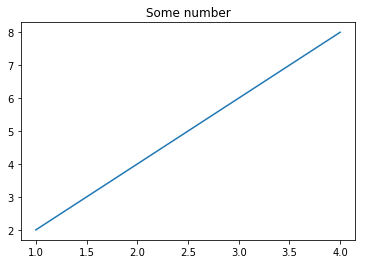

In [28]:

x = [1,2,3,4]
y = [2,4,6,8]
plt.plot(x, y) # we can directly pass x and y lists
plt.title('Some number')
plt.show()


We can also create the series with numpy. Let's try making a parabola:

In [29]:
x = np.arange(0.,5.,0.1)
#  '**' is the power operator in  Python, NOT '^'
y = x**2  

Let's use the  `type` function to understand which data types are  x and y:

In [30]:
type(x)

numpy.ndarray

In [31]:
type(y)

numpy.ndarray

Hence we have  NumPy arrays.

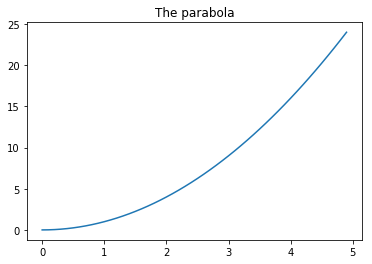

In [32]:
plt.title('The parabola')
plt.plot(x,y);

If we want the x axis units to be same as y axis, we can use function [gca](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca)

To set x and y limits, we can use `xlim` e `ylim`:

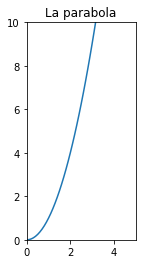

In [33]:
plt.xlim([0, 5])
plt.ylim([0,10])
plt.title('La parabola')

plt.gca().set_aspect('equal')
plt.plot(x,y);



### Matplotlib plots from pandas datastructures 

We can get plots directly from pandas data structures, always using the  _matlab style_. Here there is documentation of [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html). Let's make an example. In case of big quantity of data, it may be useful to have a qualitative idea of data by putting them in a plot:

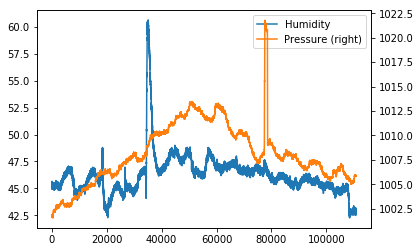

In [34]:
df.humidity.plot(label="Humidity", legend=True)
# with secondary_y=True we display number on y axis
# of graph on the right
df.pressure.plot(secondary_y=True, label="Pressure", legend=True);

We can put pressure values on horizontal axis, and see which humidity values on vertical axis have a certain pressure:

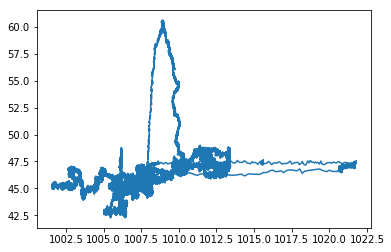

In [35]:
plt.plot(df['pressure'], df['humidity'])

Let's select in the new dataframe  `df2` the rows between the 12500th (included) and the  15000th (excluded): 

In [36]:
df2=df.iloc[12500:15000]

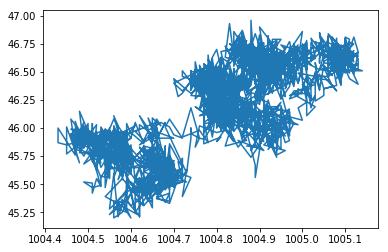

In [37]:
plt.plot(df2['pressure'], df2['humidity'])

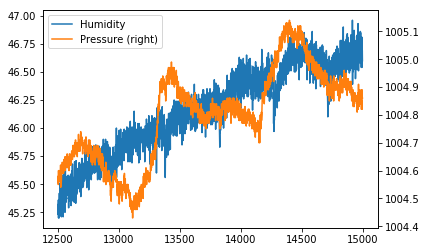

In [38]:
df2.humidity.plot(label="Humidity", legend=True)
df2.pressure.plot(secondary_y=True, label="Pressure", legend=True)

With `corr` method we can see the correlation between  DataFrame columns.

In [39]:
df2.corr()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
ROW_ID,1.000000,0.561540,0.636899,0.730764,0.945210,0.760732,0.005633,0.266995,0.172192,-0.108713,0.057601,-0.270656,0.015936,0.121838,0.075160,-0.014346,-0.026012,0.011714,NaN
temp_cpu,0.561540,1.000000,0.591610,0.670043,0.488038,0.484902,0.025618,0.165540,0.056950,-0.019815,-0.028729,-0.193077,-0.021093,0.108878,0.065628,-0.019478,-0.007527,-0.006737,NaN
temp_h,0.636899,0.591610,1.000000,0.890775,0.539603,0.614536,0.022718,0.196767,-0.024700,-0.151336,0.031512,-0.260633,-0.009408,0.173037,0.129074,-0.005255,-0.017054,-0.016113,NaN
temp_p,0.730764,0.670043,0.890775,1.000000,0.620307,0.650015,0.019178,0.192621,0.007474,-0.060122,-0.039648,-0.285640,-0.034348,0.187457,0.144595,-0.010679,-0.016674,-0.017010,NaN
humidity,0.945210,0.488038,0.539603,0.620307,1.000000,0.750000,0.012247,0.231316,0.181905,-0.108781,0.131218,-0.191957,0.040452,0.069717,0.021627,0.005625,-0.001927,0.014431,NaN
pressure,0.760732,0.484902,0.614536,0.650015,0.750000,1.000000,0.037081,0.225112,0.070603,-0.246485,0.194611,-0.173808,0.085183,-0.032049,-0.068296,-0.014838,-0.008821,0.032056,NaN
pitch,0.005633,0.025618,0.022718,0.019178,0.012247,0.037081,1.000000,0.068880,0.030448,-0.008220,-0.002278,-0.019085,0.024460,-0.053634,-0.029345,0.040685,0.041674,-0.024081,NaN
roll,0.266995,0.165540,0.196767,0.192621,0.231316,0.225112,0.068880,1.000000,-0.053750,-0.281035,-0.479779,-0.665041,0.057330,-0.049233,-0.153524,0.139427,0.134319,-0.078113,NaN
yaw,0.172192,0.056950,-0.024700,0.007474,0.181905,0.070603,0.030448,-0.053750,1.000000,0.536693,0.300571,0.394324,-0.028267,0.078585,0.068321,-0.021071,-0.009650,0.064290,NaN
mag_x,-0.108713,-0.019815,-0.151336,-0.060122,-0.108781,-0.246485,-0.008220,-0.281035,0.536693,1.000000,0.046591,0.475674,-0.097520,0.168764,0.115423,-0.017739,-0.006722,0.008456,NaN


## 5. Calculating new columns

It is possible to obtain new columns by calculating them from other columns. For example, we get new column  `mag_tot`, that is the absolute magnetic field taken from space station by  `mag_x`, `mag_y`, e `mag_z`, and then plot it:

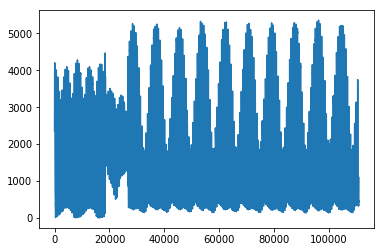

In [40]:
df['mag_tot'] = df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2
df.mag_tot.plot()

Let's find when the  magnetic field was maximal: 

In [41]:
df['time_stamp'][(df.mag_tot == df.mag_tot.values.max())]

96156    2016-02-27 16:12:31
Name: time_stamp, dtype: object

By filling in the value found on the website [isstracker.com/historical](http://www.isstracker.com/historical), we can find the positions where the magnetic field is at the highest.

### 5.1 Exercise: Meteo Fahrenheit temperature

In `meteo` dataframe, create a column `Temp (Fahrenheit)` with the temperature measured in Fahrenheit degrees.

Formula to calculate conversion from Celsius degrees (C):


$Fahrenheit = \frac{9}{5}C + 32$



In [42]:
# write here



In [43]:
# SOLUTION
print()
print("       **************  SOLUTION OUTPUT  **************")
meteo['Temp (Fahrenheit)'] = meteo['Temp']* 9/5 + 32 
meteo.head()


       **************  SOLUTION OUTPUT  **************


,Date,Pressure,Rain,Temp,Temp (Fahrenheit)
0,01/11/2017 00:00,995.4,0.0,5.4,41.72
1,01/11/2017 00:15,995.5,0.0,6.0,42.80
2,01/11/2017 00:30,995.5,0.0,5.9,42.62
3,01/11/2017 00:45,995.7,0.0,5.4,41.72
4,01/11/2017 01:00,995.7,0.0,5.3,41.54



       **************  SOLUTION OUTPUT  **************


,Date,Pressure,Rain,Temp,Temp (Fahrenheit)
0,01/11/2017 00:00,995.4,0.0,5.4,41.72
1,01/11/2017 00:15,995.5,0.0,6.0,42.80
2,01/11/2017 00:30,995.5,0.0,5.9,42.62
3,01/11/2017 00:45,995.7,0.0,5.4,41.72
4,01/11/2017 01:00,995.7,0.0,5.3,41.54


### 5.2 Exercise: Pressure vs Temperature

Pressure should be directly proportional to temperature in a closed environment [Gay-Lussac's law](https://en.wikipedia.org/wiki/Gay-Lussac%27s_law):

$\frac{P}{T} = k$

Does this holds true for `meteo` dataset? Try to find out by direct calculation of the formula and compare with `corr()` method results.

In [44]:
# SOLUTION

# as expected, in an open environment there is not much linear correlation
#meteo.corr()
#meteo['Pressure'] / meteo['Temp']

## 6. Object values

In general, when we want to manipulate objects of a known type, say strings which have type `str`,  we can write `.str` after a series and then treat the result like it were   a single string, using any operator (es: slicing) or method that particular class allows us plus others provided by pandas. (for text in particular there are various ways to manipulate it, for more details ([see pandas documentation](https://pandas.pydata.org/pandas-docs/stable/text.html))


### Filter by textual values

When we want to filter by text values, we can use `.str.contains`, here for example we select all the samples in the last days of february (which have timestamp containing `2016-02-2`) : 

In [45]:
df[  df['time_stamp'].str.contains('2016-02-2')  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp,Too hot,check_p,mag_tot
30442,30443,32.30,28.12,25.59,45.05,1008.01,1.47,51.82,51.18,9.215883,...,0.018792,0.014558,-0.000042,0.000275,0.000157,0,2016-02-20 00:00:00,True,sotto,269.091903
30443,30444,32.25,28.13,25.59,44.82,1008.02,0.81,51.53,52.21,8.710130,...,0.019290,0.014667,0.000260,0.001011,0.000149,0,2016-02-20 00:00:10,True,sotto,260.866157
30444,30445,33.07,28.13,25.59,45.08,1008.09,0.68,51.69,57.36,7.383435,...,0.018714,0.014598,0.000299,0.000343,-0.000025,0,2016-02-20 00:00:41,True,sotto,265.421154
30445,30446,32.63,28.10,25.60,44.87,1008.07,1.42,52.13,59.95,7.292313,...,0.018857,0.014565,0.000160,0.000349,-0.000190,0,2016-02-20 00:00:50,True,sotto,269.572476
30446,30447,32.55,28.11,25.60,44.94,1008.07,1.41,51.86,61.83,6.699141,...,0.018871,0.014564,-0.000608,-0.000381,-0.000243,0,2016-02-20 00:01:01,True,sotto,262.510966
30447,30448,32.47,28.12,25.61,44.83,1008.08,1.84,51.75,64.10,6.339477,...,0.018833,0.014691,-0.000233,-0.000403,-0.000337,0,2016-02-20 00:01:10,True,sotto,273.997653
30448,30449,32.41,28.11,25.61,45.00,1008.10,2.35,51.87,66.59,5.861904,...,0.018828,0.014534,-0.000225,-0.000292,-0.000004,0,2016-02-20 00:01:20,True,sotto,272.043915
30449,30450,32.41,28.12,25.61,45.02,1008.10,1.41,51.92,68.70,5.235877,...,0.018724,0.014255,0.000134,-0.000310,-0.000101,0,2016-02-20 00:01:30,True,sotto,268.608057
30450,30451,32.38,28.12,25.61,45.00,1008.12,1.46,52.04,70.98,4.775404,...,0.018730,0.014372,0.000319,0.000079,-0.000215,0,2016-02-20 00:01:40,True,sotto,271.750032
30451,30452,32.36,28.13,25.61,44.97,1008.12,1.18,51.78,73.10,4.300375,...,0.018814,0.014518,-0.000023,0.000186,-0.000118,0,2016-02-20 00:01:51,True,sotto,277.538126


### Extracting strings

To extract only the day from `timestamp` column, we can use `str` and use slice operator with square brackets:

In [46]:
df['time_stamp'].str[8:10]  

0         16
1         16
2         16
3         16
4         16
5         16
6         16
7         16
8         16
9         16
10        16
11        16
12        16
13        16
14        16
15        16
16        16
17        16
18        16
19        16
20        16
21        16
22        16
23        16
24        16
25        16
26        16
27        16
28        16
29        16
          ..
110839    29
110840    29
110841    29
110842    29
110843    29
110844    29
110845    29
110846    29
110847    29
110848    29
110849    29
110850    29
110851    29
110852    29
110853    29
110854    29
110855    29
110856    29
110857    29
110858    29
110859    29
110860    29
110861    29
110862    29
110863    29
110864    29
110865    29
110866    29
110867    29
110868    29
Name: time_stamp, Length: 110869, dtype: object

In [47]:
count, division = np.histogram(df['temp_h'])
print(count)
print(division)

[ 2242  8186 15692 22738 20114 24683  9371  5856  1131   856]
[27.2   27.408 27.616 27.824 28.032 28.24  28.448 28.656 28.864 29.072
 29.28 ]


## 7. Transforming

Suppose we want to convert all values of column temperature which are floats to integers. 

We know that to convert a float to an integer there the predefined python function `int`

In [48]:
int(23.7)

23

We would like to apply such function to all the elements of the column `humidity`. 

To do so, we can call the `transform` method and pass to it the function `int` _as a parameter_

**NOTE**: there are no round parenthesis after `int` !!!

In [49]:
df['humidity'].transform(int)

0         44
1         45
2         45
3         45
4         45
5         45
6         45
7         45
8         45
9         45
10        45
11        45
12        45
13        45
14        45
15        45
16        45
17        45
18        45
19        45
20        45
21        45
22        45
23        45
24        45
25        45
26        45
27        45
28        45
29        45
          ..
110839    42
110840    42
110841    42
110842    42
110843    42
110844    42
110845    42
110846    42
110847    43
110848    42
110849    42
110850    42
110851    42
110852    42
110853    42
110854    42
110855    42
110856    42
110857    42
110858    42
110859    42
110860    42
110861    42
110862    42
110863    42
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Just to be clear what _passing a function_ means, let's see other two _completely equivalent_ ways we could have used to pass the function:

**Defining a function:** We could have defined a function `myf` like this (notice the function MUST RETURN something !)

In [50]:
def myf(x):
    return int(x)

df['humidity'].transform(myf)

0         44
1         45
2         45
3         45
4         45
5         45
6         45
7         45
8         45
9         45
10        45
11        45
12        45
13        45
14        45
15        45
16        45
17        45
18        45
19        45
20        45
21        45
22        45
23        45
24        45
25        45
26        45
27        45
28        45
29        45
          ..
110839    42
110840    42
110841    42
110842    42
110843    42
110844    42
110845    42
110846    42
110847    43
110848    42
110849    42
110850    42
110851    42
110852    42
110853    42
110854    42
110855    42
110856    42
110857    42
110858    42
110859    42
110860    42
110861    42
110862    42
110863    42
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

**lamda function**: We could have used as well a lambda function, that is, a function without a name which is defined on one line:

In [51]:
df['humidity'].transform( lambda x: int(x) )

0         44
1         45
2         45
3         45
4         45
5         45
6         45
7         45
8         45
9         45
10        45
11        45
12        45
13        45
14        45
15        45
16        45
17        45
18        45
19        45
20        45
21        45
22        45
23        45
24        45
25        45
26        45
27        45
28        45
29        45
          ..
110839    42
110840    42
110841    42
110842    42
110843    42
110844    42
110845    42
110846    42
110847    43
110848    42
110849    42
110850    42
110851    42
110852    42
110853    42
110854    42
110855    42
110856    42
110857    42
110858    42
110859    42
110860    42
110861    42
110862    42
110863    42
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Regardless of the way we choose to pass the function, `transform` method does not change the original dataframe:

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 23 columns):
ROW_ID        110869 non-null int64
temp_cpu      110869 non-null float64
temp_h        110869 non-null float64
temp_p        110869 non-null float64
humidity      110869 non-null float64
pressure      110869 non-null float64
pitch         110869 non-null float64
roll          110869 non-null float64
yaw           110869 non-null float64
mag_x         110869 non-null float64
mag_y         110869 non-null float64
mag_z         110869 non-null float64
accel_x       110869 non-null float64
accel_y       110869 non-null float64
accel_z       110869 non-null float64
gyro_x        110869 non-null float64
gyro_y        110869 non-null float64
gyro_z        110869 non-null float64
reset         110869 non-null int64
time_stamp    110869 non-null object
Too hot       105315 non-null object
check_p       110869 non-null object
mag_tot       110869 non-null float64
dtypes: float64(18), i

If we want to add a new column, say `huimdity_int`, we have to explicitly assigne the result of transform to a new series: 

In [53]:
df['humidity_int'] = df['humidity'].transform( lambda x: int(x) )

Notice how pandas automatically infers type `int64` for the newly created column:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 24 columns):
ROW_ID          110869 non-null int64
temp_cpu        110869 non-null float64
temp_h          110869 non-null float64
temp_p          110869 non-null float64
humidity        110869 non-null float64
pressure        110869 non-null float64
pitch           110869 non-null float64
roll            110869 non-null float64
yaw             110869 non-null float64
mag_x           110869 non-null float64
mag_y           110869 non-null float64
mag_z           110869 non-null float64
accel_x         110869 non-null float64
accel_y         110869 non-null float64
accel_z         110869 non-null float64
gyro_x          110869 non-null float64
gyro_y          110869 non-null float64
gyro_z          110869 non-null float64
reset           110869 non-null int64
time_stamp      110869 non-null object
Too hot         105315 non-null object
check_p         110869 non-null object
mag_tot         

## 8. Grouping


**Reference**: 

* [PythonDataScienceHandbook: Aggregation and Grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

It is pretty easy to group items and perform aggregated calculations by using `groupby` method. Let's say we want to count how many huidity readings were taken for each integer humidity (here we use pandas groupby, but for histograms you could also use [numpy](https://stackoverflow.com/a/13130357))

After `groupby` we can use `count()` aggregation function (other common ones are `sum()`, `mean()`, `min()`, `max()`):

In [55]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

Notice we got only 19 rows. To have a series that fills the whole table, assigning to each row the count of its own group, we can use `transform` like this: 

In [56]:
df.groupby(['humidity_int'])['humidity'].transform('count')

0         13029
1         32730
2         32730
3         32730
4         32730
5         32730
6         32730
7         32730
8         32730
9         32730
10        32730
11        32730
12        32730
13        32730
14        32730
15        32730
16        32730
17        32730
18        32730
19        32730
20        32730
21        32730
22        32730
23        32730
24        32730
25        32730
26        32730
27        32730
28        32730
29        32730
          ...  
110839     2776
110840     2776
110841     2776
110842     2776
110843     2776
110844     2776
110845     2776
110846     2776
110847     2479
110848     2776
110849     2776
110850     2776
110851     2776
110852     2776
110853     2776
110854     2776
110855     2776
110856     2776
110857     2776
110858     2776
110859     2776
110860     2776
110861     2776
110862     2776
110863     2776
110864     2776
110865     2776
110866     2776
110867     2776
110868     2776
Name: humidity, Length: 

As usual, `group_by` does not modify the dataframe, if we want the result stored in the dataframe we need to assign the result to a new column:

In [57]:
df['Humidity counts'] = df.groupby(['humidity_int'])['humidity'].transform('count')

In [58]:
df

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,gyro_x,gyro_y,gyro_z,reset,time_stamp,Too hot,check_p,mag_tot,humidity_int,Humidity counts
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,True,sotto,2368.337207,44,13029
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,True,sotto,2615.870247,45,32730
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,NaN,sotto,2648.484927,45,32730
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,True,sotto,2665.305485,45,32730
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,NaN,sotto,2732.388620,45,32730
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,...,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30,True,sotto,2736.836291,45,32730
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,...,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41,NaN,sotto,2756.496929,45,32730
7,8,31.66,27.55,25.01,45.34,1001.70,1.49,53.65,186.08,-50.668232,...,-0.000044,0.000436,0.000301,0,2016-02-16 10:45:50,NaN,sotto,2778.429164,45,32730
8,9,31.67,27.54,25.01,45.20,1001.72,1.22,53.77,186.55,-50.761529,...,0.000358,0.000651,0.000187,0,2016-02-16 10:46:01,NaN,sotto,2773.029554,45,32730
9,10,31.67,27.54,25.01,45.41,1001.75,1.63,53.46,185.94,-51.243832,...,0.000266,0.000676,0.000356,0,2016-02-16 10:46:10,NaN,sotto,2809.446772,45,32730


## 9. Exercise: meteo average temperatures

### 9.1 meteo plot

✪ Put in a plot the temperature from  dataframe _meteo:_


In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# write here



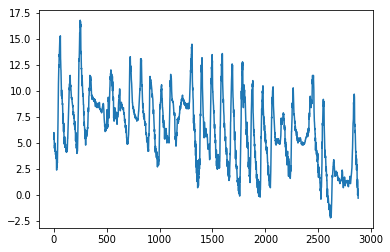

In [60]:
# SOLUTION
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

meteo.Temp.plot()

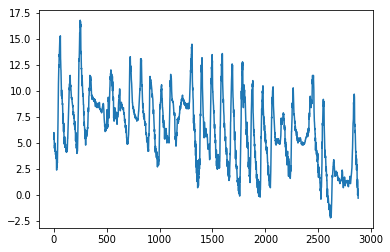


### 9.2 meteo pressure and raining

✪ In the same plot as above show the pressure and amount of raining.



In [61]:
# write here


In [61]:
# write here



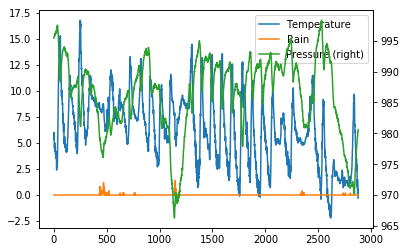

In [62]:
# SOLUTION

meteo.Temp.plot(label="Temperature", legend=True)
meteo.Rain.plot(label="Rain", legend=True)
meteo.Pressure.plot(secondary_y=True, label="Pressure", legend=True);

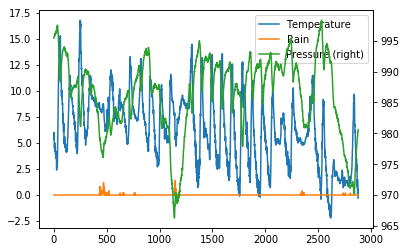

### 9.3 meteo average temperature

✪✪✪ Calculate the average temperature for each day, and show it in the plot, so to have a couple new columns like these:

```
    Day       Avg_day_temp
01/11/2017      7.983333
01/11/2017      7.983333
01/11/2017      7.983333
    .               .
    .               .
02/11/2017      7.384375
02/11/2017      7.384375
02/11/2017      7.384375
    .               .
    .               .
```

**HINT 1**: add  `'Day'` column by extracting only the day from the date. To do it, use the function  `.str`applied to all the column.

**HINT 2**: There are various ways to solve the exercise:

- Most perfomant and elegant is with `groupby` operator, see [Pandas trasform - more than meets the eye](https://towardsdatascience.com/pandas-transform-more-than-meets-the-eye-928542b40b56)
- As alternative, you may use a `for` to cycle through days. Typically, using a `for` is not a good idea with Pandas, as on large datasets it can take a lot to perform the updates. Still, since this dataset is small enough,  you should get results in a decent amount of time.


In [63]:
# write here


In [63]:
# write here




    ****************    SOLUTION 1 OUTPUT - recalculate average for every row - slow !

WITH AVERAGE TEMPERATURE
               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


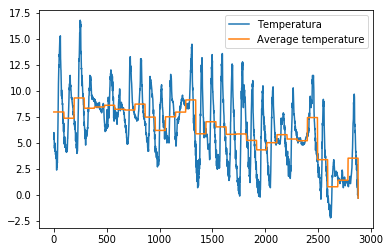

In [64]:
# SOLUTION
meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Day'] = meteo['Date'].str[0:10]

#print("WITH DAY")
#print(meteo.head())
for day in meteo['Day']:
    avg_day_temp = meteo[(meteo.Day == day)].Temp.values.mean()
    meteo.loc[(meteo.Day == day),'Avg_day_temp']= avg_day_temp

print()
print('    ****************    SOLUTION 1 OUTPUT - recalculate average for every row - slow !')
print()
print("WITH AVERAGE TEMPERATURE")
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Avg_day_temp.plot(label="Average temperature", legend=True)    


    ****************    SOLUTION 1 OUTPUT - recalculate average for every row - slow !

WITH AVERAGE TEMPERATURE
               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


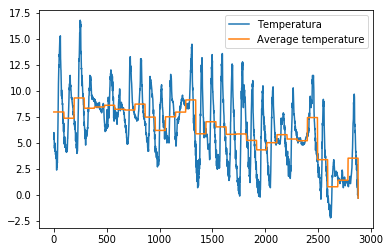



********    SOLUTION 2 OUTPUT - recalculate average only 30 times
                                by using a dictionary d_avg, faster but not yet optimal
               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


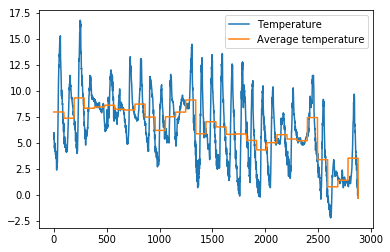

In [65]:
# SOLUTION

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Day'] = meteo['Date'].str[0:10]
#print()
#print("WITH DAY")
#print(meteo.head())
d_avg = {}
for day in meteo['Day']:
    if day not in d_avg:
        d_avg[day] =  meteo[ meteo['Day'] == day  ]['Temp'].mean()

for day in meteo['Day']:
    meteo.loc[(meteo.Day == day),'Avg_day_temp']= d_avg[day]
    
print()
print()
print('********    SOLUTION 2 OUTPUT - recalculate average only 30 times')
print('                                by using a dictionary d_avg, faster but not yet optimal')
print(meteo.head())
meteo.Temp.plot(label="Temperature", legend=True)
meteo.Avg_day_temp.plot(label="Average temperature", legend=True)    



********    SOLUTION 2 OUTPUT - recalculate average only 30 times
                                by using a dictionary d_avg, faster but not yet optimal
               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


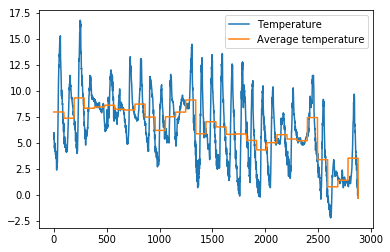


****************  SOLUTION 3 - OUTPUT  -  best solution with groupby and transform 

WITH AVERAGE TEMPERATURE
               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


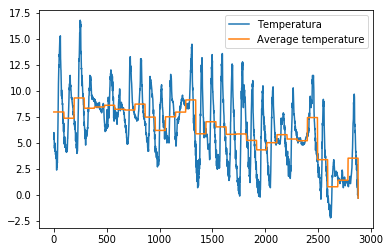

In [66]:
# SOLUTION

print()
print('****************  SOLUTION 3 - OUTPUT  -  best solution with groupby and transform ')

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Day'] = meteo['Date'].str[0:10]
# .transform is needed to avoid getting a table with only 30 lines
meteo['Avg_day_temp'] = meteo.groupby('Day')['Temp'].transform('mean')

meteo
print()
print("WITH AVERAGE TEMPERATURE")
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Avg_day_temp.plot(label="Average temperature", legend=True)


****************  SOLUTION 3 - OUTPUT  -  best solution with groupby and transform 

WITH AVERAGE TEMPERATURE
               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


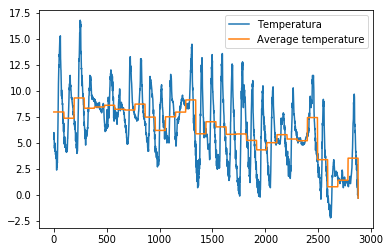

## 10. Merging tables

Suppose we want to add a column with geographical position of the ISS. To do so, we would need to join our dataset with another one containing such information. Let's take for example the dataset [iss_coords.csv](iss_coords.csv)

In [67]:
iss_coords = pd.read_csv('iss-coords.csv', encoding='UTF-8')

In [68]:
iss_coords

,timestamp,lat,lon
0,2016-01-01 05:11:30,-45.103458,14.083858
1,2016-01-01 06:49:59,-37.597242,28.931170
2,2016-01-01 11:52:30,17.126141,77.535602
3,2016-01-01 11:52:30,17.126464,77.535861
4,2016-01-01 14:54:08,7.259561,70.001561
5,2016-01-01 18:24:00,-15.990725,-106.400927
6,2016-01-01 22:45:51,31.602388,85.647998
7,2016-01-02 07:48:31,-51.578009,-26.736801
8,2016-01-02 10:50:19,-36.512021,14.452174
9,2016-01-02 14:01:27,-27.459029,10.991151


We notice there is a `timestamp` column, which unfortunately has a slightly different name that `time_stamp` column (notice the underscore `_`) in original astropi dataset:

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 25 columns):
ROW_ID             110869 non-null int64
temp_cpu           110869 non-null float64
temp_h             110869 non-null float64
temp_p             110869 non-null float64
humidity           110869 non-null float64
pressure           110869 non-null float64
pitch              110869 non-null float64
roll               110869 non-null float64
yaw                110869 non-null float64
mag_x              110869 non-null float64
mag_y              110869 non-null float64
mag_z              110869 non-null float64
accel_x            110869 non-null float64
accel_y            110869 non-null float64
accel_z            110869 non-null float64
gyro_x             110869 non-null float64
gyro_y             110869 non-null float64
gyro_z             110869 non-null float64
reset              110869 non-null int64
time_stamp         110869 non-null object
Too hot            105315 non-null

To merge datasets according to the columns, we can use the command `merge` like this:

In [70]:
# remember merge produces a NEW dataframe

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp')

# merge will add both time_stamp and timestamp columns, 
# so we remove the duplicate column `timestamp`
geo_astropi = geo_astropi.drop('timestamp', axis=1)

In [71]:
geo_astropi

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,gyro_z,reset,time_stamp,Too hot,check_p,mag_tot,humidity_int,Humidity counts,lat,lon
0,23231,32.53,28.37,25.89,45.31,1006.04,1.31,51.63,34.91,21.125001,...,0.000046,0,2016-02-19 03:49:00,True,sotto,2345.207992,45,32730,31.434741,52.917464
1,27052,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,0.000034,0,2016-02-19 14:30:40,True,sotto,323.634786,45,32730,-46.620658,-57.311657
2,27052,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,0.000034,0,2016-02-19 14:30:40,True,sotto,323.634786,45,32730,-46.620477,-57.311138
3,46933,32.21,28.05,25.50,47.36,1012.41,0.67,52.40,27.57,15.441683,...,0.000221,0,2016-02-21 22:14:11,True,sopra,342.159257,47,14176,19.138359,-140.211489
4,64572,32.32,28.18,25.61,47.45,1010.62,1.14,51.41,33.68,11.994554,...,0.000030,0,2016-02-23 23:40:50,True,sopra,264.655601,47,14176,4.713819,80.261665
5,68293,32.39,28.26,25.70,46.83,1010.51,0.61,51.91,287.86,6.554283,...,0.000171,0,2016-02-24 10:05:51,True,sopra,436.876111,46,35775,-46.061583,22.246025
6,73374,32.38,28.18,25.62,46.52,1008.28,0.90,51.77,30.80,9.947132,...,-0.000375,0,2016-02-25 00:23:01,True,sopra,226.089258,46,35775,47.047346,137.958918
7,90986,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,-0.000047,0,2016-02-27 01:43:10,True,sotto,149.700293,45,32730,-41.049112,30.193004
8,90986,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,-0.000047,0,2016-02-27 01:43:10,True,sotto,149.700293,45,32730,-8.402991,-100.981726
9,102440,32.62,28.62,26.02,45.15,1006.06,1.12,50.44,301.74,10.348327,...,-0.000061,0,2016-02-28 09:48:40,True,sotto,381.014223,45,32730,50.047523,175.566751


### Exercise 10.1 better merge

If you notice, above table does have `lat` and `lon` columns, but has very few rows. Why ?  Try to merge the tables in some meaningful way so to have all the original rows and all cells of `lat` and `lon` filled. 

- For other merging stategies, read about attribute `how` in  [Why And How To Use Merge With Pandas in Python](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)
- To fill missing values don't use fancy interpolation techniques, just put the station position in that given day or hour

In [72]:
# write here

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp', how='left')

pd.merge_ordered(df, iss_coords, fill_method='ffill', how='left', left_on='time_stamp', right_on='timestamp')
geo_astropi

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,reset,time_stamp,Too hot,check_p,mag_tot,humidity_int,Humidity counts,timestamp,lat,lon
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,20,2016-02-16 10:44:40,True,sotto,2368.337207,44,13029,NaN,NaN,NaN
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0,2016-02-16 10:44:50,True,sotto,2615.870247,45,32730,NaN,NaN,NaN
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0,2016-02-16 10:45:00,NaN,sotto,2648.484927,45,32730,NaN,NaN,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0,2016-02-16 10:45:10,True,sotto,2665.305485,45,32730,NaN,NaN,NaN
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0,2016-02-16 10:45:20,NaN,sotto,2732.388620,45,32730,NaN,NaN,NaN
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,...,0,2016-02-16 10:45:30,True,sotto,2736.836291,45,32730,NaN,NaN,NaN
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,...,0,2016-02-16 10:45:41,NaN,sotto,2756.496929,45,32730,NaN,NaN,NaN
7,8,31.66,27.55,25.01,45.34,1001.70,1.49,53.65,186.08,-50.668232,...,0,2016-02-16 10:45:50,NaN,sotto,2778.429164,45,32730,NaN,NaN,NaN
8,9,31.67,27.54,25.01,45.20,1001.72,1.22,53.77,186.55,-50.761529,...,0,2016-02-16 10:46:01,NaN,sotto,2773.029554,45,32730,NaN,NaN,NaN
9,10,31.67,27.54,25.01,45.41,1001.75,1.63,53.46,185.94,-51.243832,...,0,2016-02-16 10:46:10,NaN,sotto,2809.446772,45,32730,NaN,NaN,NaN


In [72]:
# write here



,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,reset,time_stamp,Too hot,check_p,mag_tot,humidity_int,Humidity counts,timestamp,lat,lon
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,20,2016-02-16 10:44:40,True,sotto,2368.337207,44,13029,NaN,NaN,NaN
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0,2016-02-16 10:44:50,True,sotto,2615.870247,45,32730,NaN,NaN,NaN
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0,2016-02-16 10:45:00,NaN,sotto,2648.484927,45,32730,NaN,NaN,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0,2016-02-16 10:45:10,True,sotto,2665.305485,45,32730,NaN,NaN,NaN
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0,2016-02-16 10:45:20,NaN,sotto,2732.388620,45,32730,NaN,NaN,NaN
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,...,0,2016-02-16 10:45:30,True,sotto,2736.836291,45,32730,NaN,NaN,NaN
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,...,0,2016-02-16 10:45:41,NaN,sotto,2756.496929,45,32730,NaN,NaN,NaN
7,8,31.66,27.55,25.01,45.34,1001.70,1.49,53.65,186.08,-50.668232,...,0,2016-02-16 10:45:50,NaN,sotto,2778.429164,45,32730,NaN,NaN,NaN
8,9,31.67,27.54,25.01,45.20,1001.72,1.22,53.77,186.55,-50.761529,...,0,2016-02-16 10:46:01,NaN,sotto,2773.029554,45,32730,NaN,NaN,NaN
9,10,31.67,27.54,25.01,45.41,1001.75,1.63,53.46,185.94,-51.243832,...,0,2016-02-16 10:46:10,NaN,sotto,2809.446772,45,32730,NaN,NaN,NaN


## Continue

See [EURES job offers](https://en.softpython.org/pandas/eures-jobs-sol.html) worksheet

## References

- [Andrea Passerini, Lecture A07 - Pandas](http://disi.unitn.it/~passerini/teaching/2020-2021/sci-pro/slides/A07-pandas.pdf)
